In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model

import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.ops import unary_union

In [65]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

my_cmap = "viridis"
plot_x = 16
plot_y = 12
subtitle_fontsize = 25
title_fontsize = 30
legend_fontsize = 20

In [3]:
kmean_sa2_pred = gpd.read_file("Predictions\\kmean_sa2_pred.geojson")
kmean_high_inc = gpd.read_file("Predictions\\kmean_high_inc.geojson")
kmean_inc = gpd.read_file("Predictions\\kmean_inc.geojson")
kmean_totalvehs = gpd.read_file("Predictions\\kmean_totalvehs.geojson")
kmean_sepHouse = gpd.read_file("Predictions\\kmean_sepHouse.geojson")
kmean_ownHouse = gpd.read_file("Predictions\\kmean_ownHouse.geojson")
kmean_hhsize = gpd.read_file("Predictions\\kmean_hhsize.geojson")
kmean_age = gpd.read_file("Predictions\\kmean_age.geojson")

In [4]:

australia = gpd.read_file("Shape\sa2_2016_aust_shape\SA2_2016_AUST.shp")
sua = gpd.read_file("Shape\SUA_2021_AUST_GDA2020_SHP\SUA_2021_AUST_GDA2020.shp")
mel_gel_sau = sua[(sua["SUA_CODE21"] == "2008") | (sua["SUA_CODE21"] == "2011")]

In [39]:
sa2_map = gpd.overlay(australia, mel_gel_sau, how='intersection')
sa2_map = sa2_map[["SA2_MAIN16", "geometry"]]

C:\Users\danla\AppData\Local\Temp\ipykernel_12716\2612418718.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4283
Right CRS: EPSG:7844

  sa2_map = gpd.overlay(australia, mel_gel_sau, how='intersection')


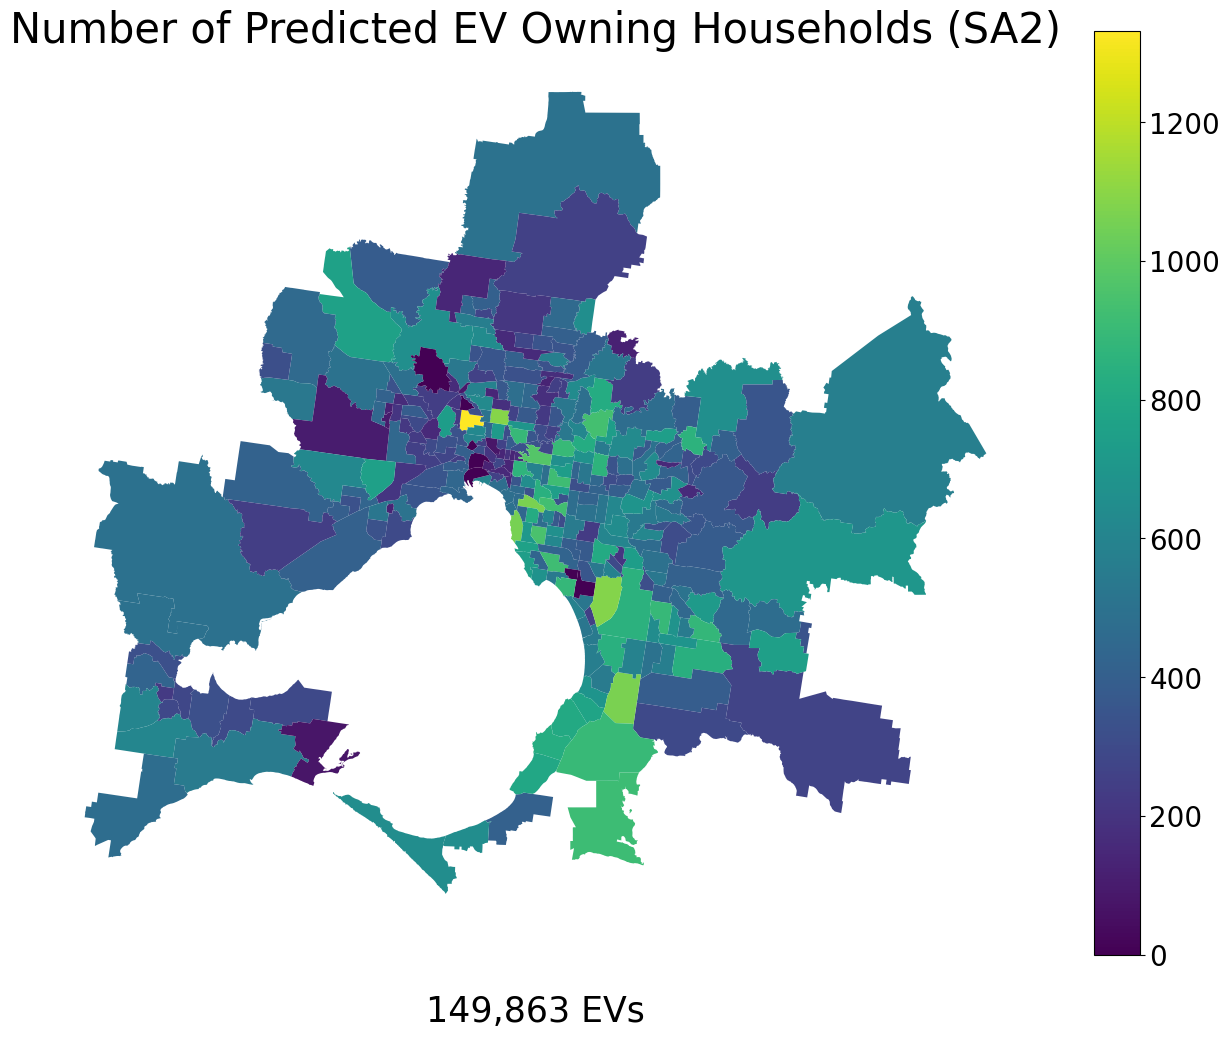

In [66]:
temp = sa2_map.merge(kmean_sa2_pred.drop(columns="geometry"), on="SA2_MAIN16", how="left").fillna(0)

fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
temp.plot(column="EVs", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
total_ev = int(temp['EVs'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.set_title("Number of Predicted EV Owning Households (SA2)", fontsize=title_fontsize)  
ax1.text(0.5, -0.1, f"{formatted_total_ev} EVs", fontsize=subtitle_fontsize, transform=ax1.transAxes, ha='center') 
ax1.axis('off')


sm5 = ScalarMappable(cmap=my_cmap)
sm5.set_array(temp["EVs"])
cbar5 = plt.colorbar(sm5, ax=ax1)
cbar5.ax.tick_params(axis='y', labelsize=legend_fontsize)
plt.show()

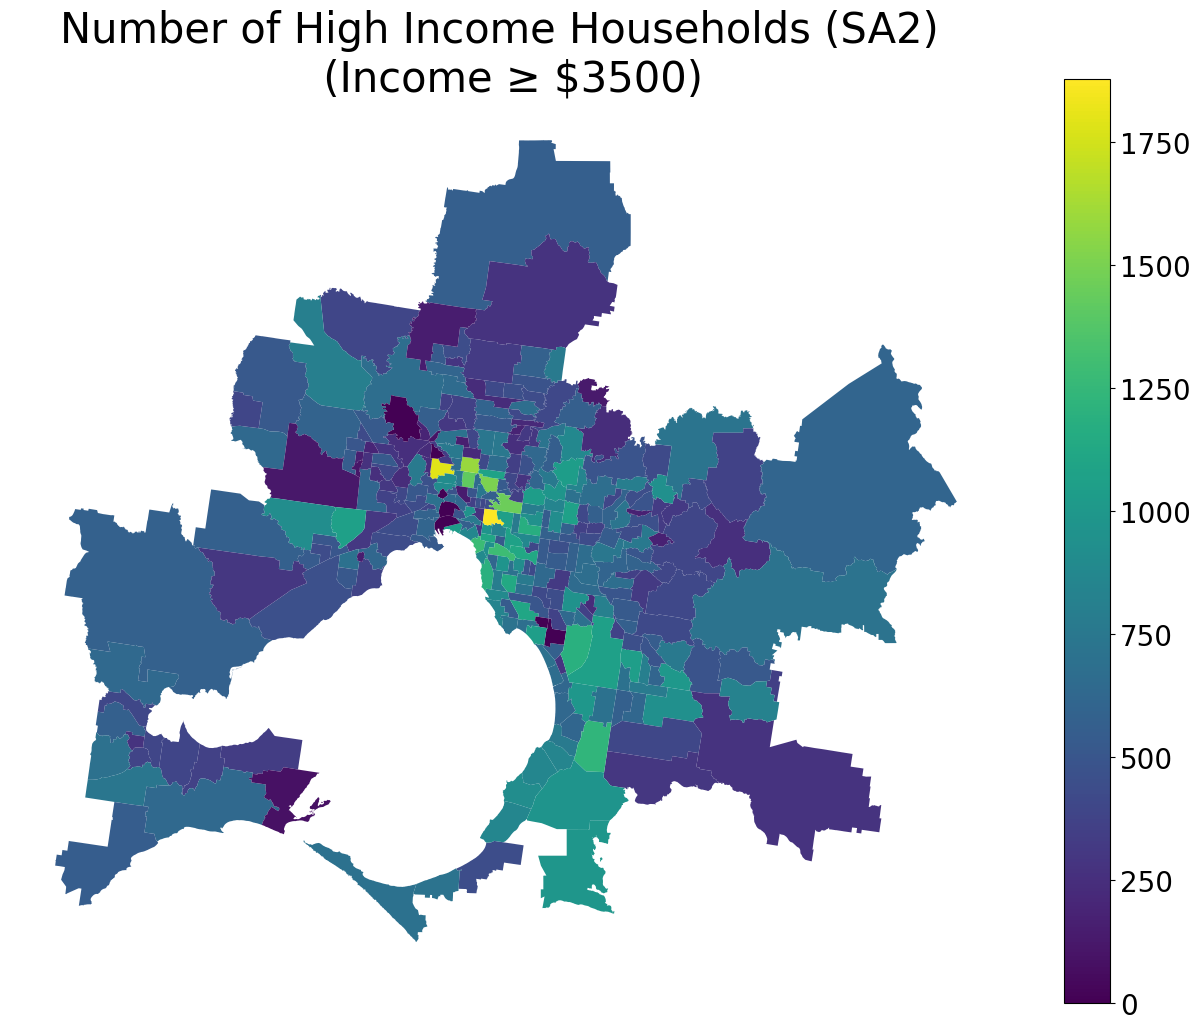

In [72]:
temp = sa2_map.merge(kmean_high_inc.drop(columns="geometry"), on="SA2_MAIN16", how="left").fillna(0)
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
temp.plot(column="highinccount", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
total_ev = int(temp['highinccount'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.set_title("Number of High Income Households (SA2) \n (Income ≥ $3500)", fontsize=title_fontsize)  
ax1.axis('off')

sm5 = ScalarMappable(cmap=my_cmap)
sm5.set_array(temp["highinccount"])
cbar5 = plt.colorbar(sm5, ax=ax1)
cbar5.ax.tick_params(axis='y', labelsize=legend_fontsize)
plt.show()

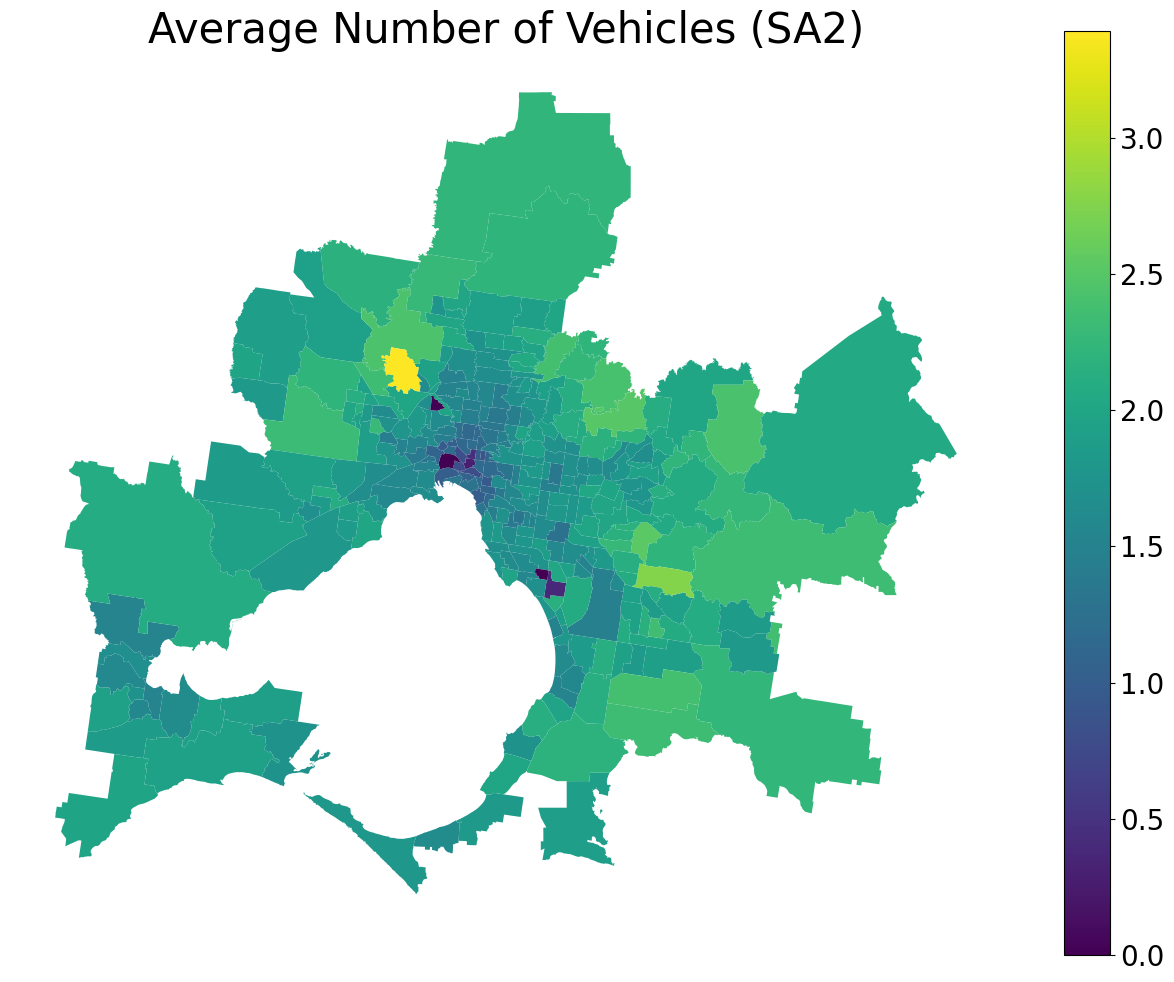

In [69]:
temp = sa2_map.merge(kmean_totalvehs.drop(columns="geometry"), on="SA2_MAIN16", how="left").fillna(0)
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
temp.plot(column="TOTALVEHS", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
total_ev = int(temp['TOTALVEHS'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.set_title("Average Number of Vehicles (SA2)", fontsize=title_fontsize)  
ax1.axis('off')

sm5 = ScalarMappable(cmap=my_cmap)
sm5.set_array(temp["TOTALVEHS"])
cbar5 = plt.colorbar(sm5, ax=ax1)
cbar5.ax.tick_params(axis='y', labelsize=legend_fontsize)
plt.show()

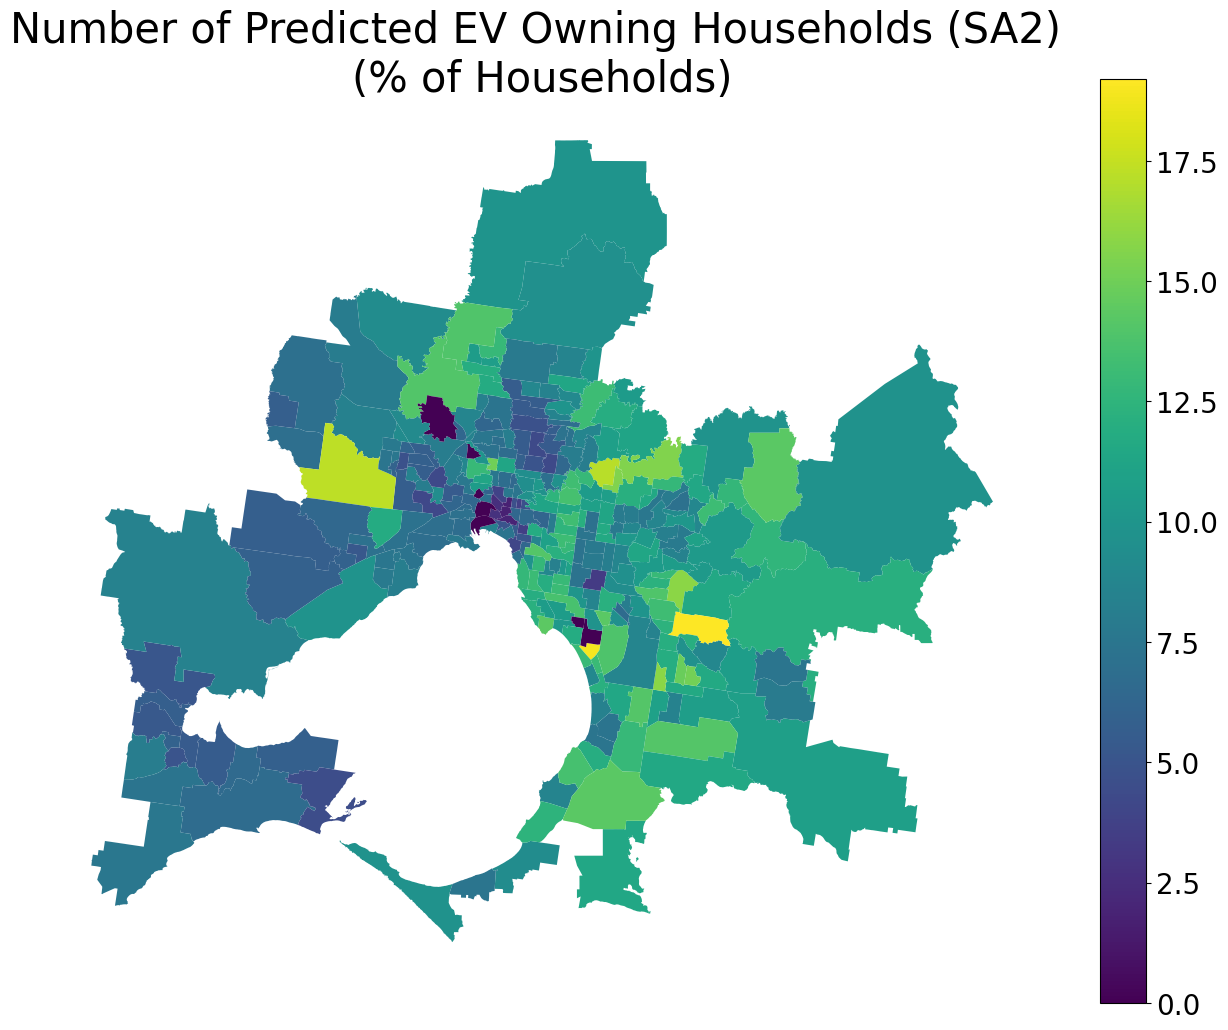

In [70]:
temp = sa2_map.merge(kmean_sa2_pred.drop(columns="geometry"), on="SA2_MAIN16", how="left").fillna(0)
fig, ax1 = plt.subplots(figsize=(plot_x, plot_y))
temp.plot(column="percentage", cmap=my_cmap, ax=ax1)
ax1.set_xticks([])  
ax1.set_yticks([])  
total_ev = int(temp['percentage'].sum())
formatted_total_ev = '{:,}'.format(total_ev)
ax1.set_title("Number of Predicted EV Owning Households (SA2) \n(% of Households)", fontsize=title_fontsize)   
ax1.axis('off')

sm5 = ScalarMappable(cmap=my_cmap)
sm5.set_array(temp["percentage"])
cbar5 = plt.colorbar(sm5, ax=ax1)
cbar5.ax.tick_params(axis='y', labelsize=legend_fontsize)
plt.show()
